In [1]:
#Read salary data with Pandas
import pandas as pd

salary = pd.read_csv('salary.csv')
salary.head()

,YearsExperience,EducationLevel,Industry,City,Salary
0,7.49,PhD,Tech,Jakarta,33355
1,19.01,PhD,Retail,Bandung,53316
2,14.64,Master,Retail,Jakarta,39369
3,11.97,High School,Finance,Jakarta,20056
4,3.12,PhD,Healthcare,Bandung,23150


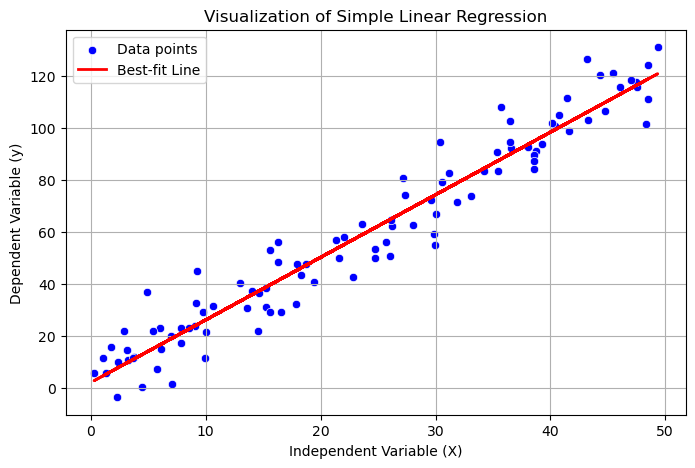

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate hypothetical dataset
X = np.random.uniform(0, 50, 100)
y = 2.5 * X + np.random.normal(0, 10, 100)  # y = 2.5X + noise

# Reshape X for sklearn (it expects 2D arrays for features)
X_reshaped = X.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X_reshaped, y)

# Predict y values using the fitted model
y_pred = model.predict(X_reshaped)

# Plotting the data points and best-fit regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X, y=y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best-fit Line')

# Adding titles and labels
plt.title('Visualization of Simple Linear Regression')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()


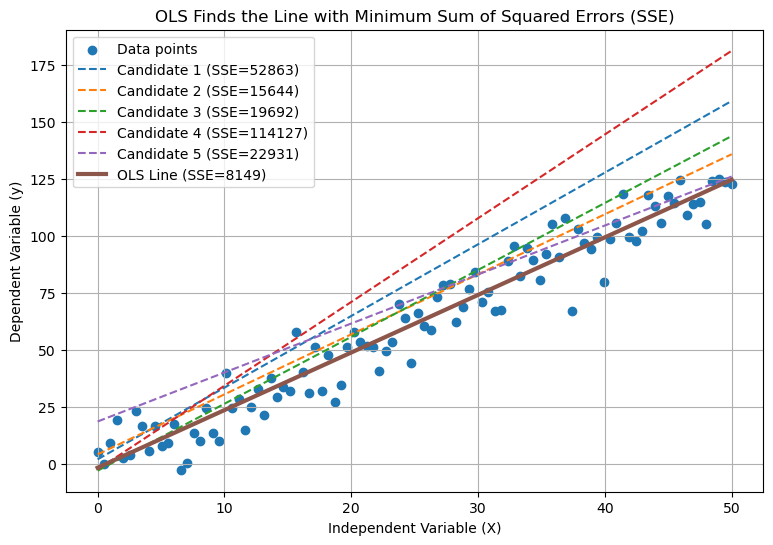

OLS Intercept: -1.73
OLS Slope: 2.53
OLS SSE: 8149

Candidate 1: Intercept=1.95, Slope=3.15, SSE=52863
Candidate 2: Intercept=4.11, Slope=2.63, SSE=15644
Candidate 3: Intercept=-3.05, Slope=2.94, SSE=19692
Candidate 4: Intercept=-2.50, Slope=3.68, SSE=114127
Candidate 5: Intercept=18.55, Slope=2.15, SSE=22931


In [3]:

# ------------------------------------------------------------------------------
# 1. Generate synthetic data
# ------------------------------------------------------------------------------

np.random.seed(42)
X = np.linspace(0, 50, 100)
y = 2.5 * X + np.random.normal(0, 10, size=X.shape[0])

# Prepare feature matrix for scikit-learn (expects 2‑D)
X_reshaped = X.reshape(-1, 1)

# ------------------------------------------------------------------------------
# 2. Fit the Ordinary Least Squares (OLS) regression model
# ------------------------------------------------------------------------------

ols_model = LinearRegression()
ols_model.fit(X_reshaped, y)

beta0_ols = ols_model.intercept_
beta1_ols = ols_model.coef_[0]
y_pred_ols = ols_model.predict(X_reshaped)
sse_ols = np.sum((y - y_pred_ols) ** 2)

# ------------------------------------------------------------------------------
# 3. Create a few random “candidate” lines for comparison
# ------------------------------------------------------------------------------

np.random.seed(0)
candidate_lines = []
for _ in range(5):
    b0_rand = np.random.uniform(-20, 20)
    b1_rand = np.random.uniform(1, 4)
    y_rand = b0_rand + b1_rand * X
    sse_rand = np.sum((y - y_rand) ** 2)
    candidate_lines.append((b0_rand, b1_rand, sse_rand, y_rand))

# ------------------------------------------------------------------------------
# 4. Visualize data points, OLS best‑fit line, and candidate lines
# ------------------------------------------------------------------------------

plt.figure(figsize=(9, 6))

# Scatter plot of the synthetic data
plt.scatter(X, y, label="Data points")

# Plot random candidate lines (dashed)
for idx, (b0, b1, sse, y_rand) in enumerate(candidate_lines, start=1):
    plt.plot(X, y_rand, linestyle="--", label=f"Candidate {idx} (SSE={sse:.0f})")

# Plot the OLS best‑fit line (solid, thicker)
plt.plot(X, y_pred_ols, linewidth=3, label=f"OLS Line (SSE={sse_ols:.0f})")

plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.title("OLS Finds the Line with Minimum Sum of Squared Errors (SSE)")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------
# 5. Print numerical comparison of SSE values
# ------------------------------------------------------------------------------

print(f"OLS Intercept: {beta0_ols:.2f}")
print(f"OLS Slope: {beta1_ols:.2f}")
print(f"OLS SSE: {sse_ols:.0f}\n")

for idx, (b0, b1, sse, _) in enumerate(candidate_lines, start=1):
    print(f"Candidate {idx}: Intercept={b0:.2f}, Slope={b1:.2f}, SSE={sse:.0f}")


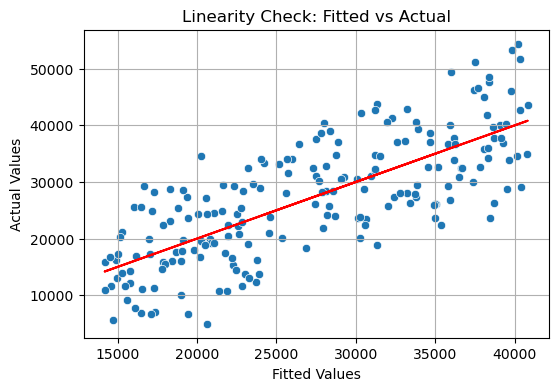

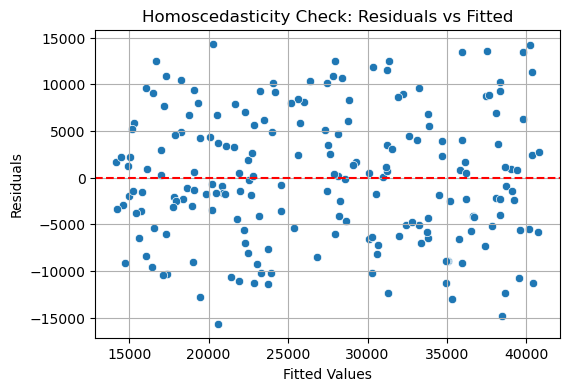

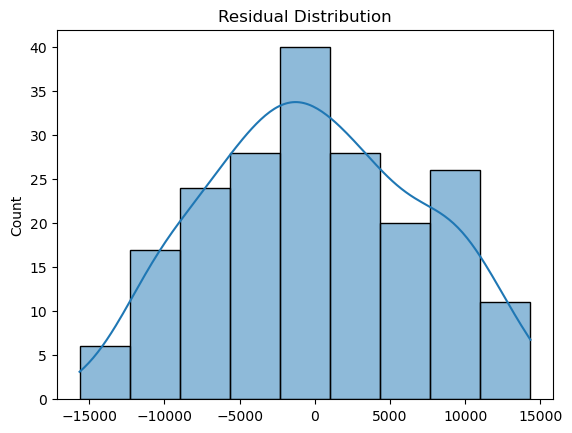

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     260.9
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           5.43e-38
Time:                        19:53:51   Log-Likelihood:                -2053.0
No. Observations:                 200   AIC:                             4110.
Df Residuals:                     198   BIC:                             4117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.404e+04    950.720     

In [4]:
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson 

## Data preparation for Independent and Dependent variable
X = salary[['YearsExperience']]
X = sm.add_constant(X)          # adds the intercept term
y = salary['Salary']

## Fit Linear regression

ols_model = sm.OLS(y, X).fit()

# Extract residuals & fitted values
residuals = ols_model.resid
fitted    = ols_model.fittedvalues

## Linearity: Actual vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=y)
plt.plot(fitted, fitted, color='red')
plt.title("Linearity Check: Fitted vs Actual")
plt.xlabel("Fitted Values")
plt.ylabel("Actual Values")
plt.grid(True)
plt.show()

## Homoscedasticity: Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Homoscedasticity Check: Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## Normality: Historgram plot
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
## Shapiro–Wilk test (normality)
shapiro_stat, shapiro_p = shapiro(residuals)

## Durbin–Watson test (independence)
dw_stat = durbin_watson(residuals)   

print(ols_model.summary())
print(f"\nShapiro–Wilk p-value : {shapiro_p:.4f}")
print(f"Durbin–Watson stat   : {dw_stat:.4f}")


In [5]:
# Detect multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

education_map = {"High School": 1, "Bachelor": 2, "Master": 3, "PhD": 4}
salary["EducationCode"] = salary["EducationLevel"].map(education_map)
features = ['YearsExperience', 'EducationCode']

X = salary[features]
X_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data

,feature,VIF
0,const,8.328638
1,YearsExperience,1.003532
2,EducationCode,1.003532


In [6]:
# Train muiltiple regression model

# Define predictors and target
X = salary[['YearsExperience', 'EducationCode']]
y = salary['Salary']

# Add intercept term (constant)
X_const = sm.add_constant(X)

# Fit Multiple Linear Regression Model using OLS
multiple_model = sm.OLS(y, X_const).fit()

# Display model summary
print(multiple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     568.3
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.54e-82
Time:                        19:53:51   Log-Likelihood:                -1945.8
No. Observations:                 200   AIC:                             3898.
Df Residuals:                     197   BIC:                             3908.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1930.7443    835.852     

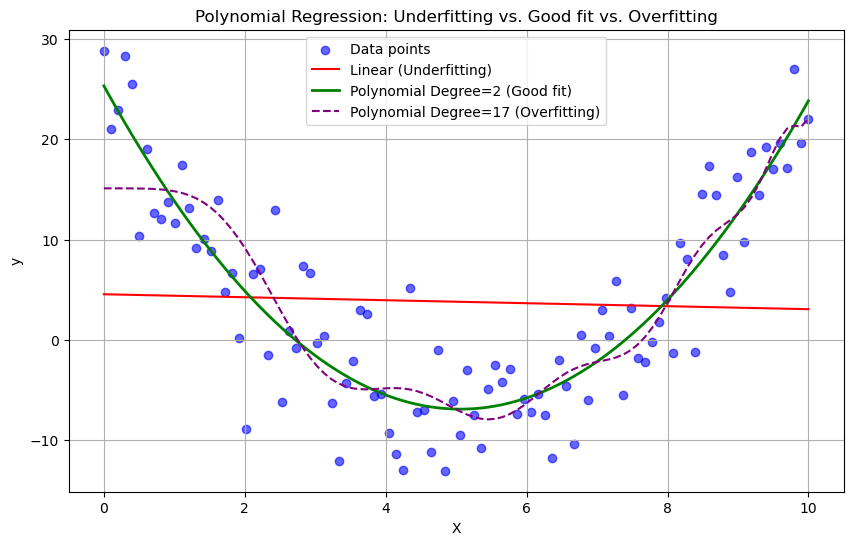

In [7]:
# Polynomial Regression example
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data (non-linear pattern)
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = X**2 - 10*X + 20 + np.random.normal(0, 5, 100)

# Fit linear model (underfitting scenario)
linear_model = LinearRegression().fit(X.reshape(-1, 1), y)
y_linear_fit = linear_model.predict(X.reshape(-1, 1))

# Fit polynomial model (optimal fitting scenario, degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X.reshape(-1, 1), y)
y_poly_fit = poly_model.predict(X.reshape(-1, 1))

# Fit overly complex polynomial (overfitting scenario, degree=17)
poly_overfit = make_pipeline(PolynomialFeatures(degree=17), LinearRegression())
poly_overfit.fit(X.reshape(-1, 1), y)
y_overfit = poly_overfit.predict(X.reshape(-1, 1))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X, y_linear_fit, color='red', label='Linear (Underfitting)')
plt.plot(X, y_poly_fit, color='green', linewidth=2, label='Polynomial Degree=2 (Good fit)')
plt.plot(X, y_overfit, color='purple', linestyle='--', label='Polynomial Degree=17 (Overfitting)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression: Underfitting vs. Good fit vs. Overfitting')
plt.legend()
plt.grid(True)
plt.show()


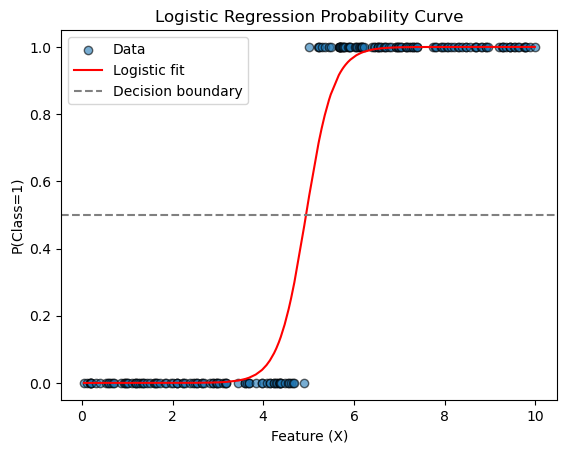

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(200) * 10)
y = (X > 5).astype(int)  # Simplified threshold

# Fit logistic model
model = LogisticRegression()
model.fit(X.reshape(-1,1), y)
probs = model.predict_proba(X.reshape(-1,1))[:,1]

# Plot
plt.scatter(X, y, edgecolor='k', alpha=0.6, label='Data')
plt.plot(X, probs, color='red', label='Logistic fit')
plt.axhline(0.5, color='grey', linestyle='--', label='Decision boundary')
plt.xlabel('Feature (X)')
plt.ylabel('P(Class=1)')
plt.title('Logistic Regression Probability Curve')
plt.legend()
plt.show()


In [9]:
#Read churn data with Pandas

churn = pd.read_csv('churn.csv')
churn.sample(5)

,Age,AnnualIncome,Gender,MembershipDuration,Location,Churn
90,51,67505.44,Male,8,Urban,0
97,41,72385.77,Male,9,Suburban,0
2,54,87496.12,Female,4,Urban,0
150,46,40273.34,Female,5,Rural,0
77,26,10210.55,Male,1,Rural,1


In [10]:
import statsmodels.api as sm
import pandas as pd

# One-hot encode as numeric
X_enc = pd.get_dummies(
    churn[['Age','Location']],
    columns=['Location'],
    drop_first=True,
    dtype=float,          # ensures numeric dtypes
)

X_enc = sm.add_constant(X_enc)       

logit_model = sm.Logit(y, X_enc)
res = logit_model.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.688499
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Sep 2025   Pseudo R-squ.:                0.004118
Time:                        19:53:53   Log-Likelihood:                -137.70
converged:                       True   LL-Null:                       -138.27
Covariance Type:            nonrobust   LLR p-value:                    0.7677
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4569      0.509      0.899      0.369      -0.540       1.454
Age     

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = churn[['Age', 'AnnualIncome', 'MembershipDuration', 'Gender', 'Location']]
y = churn['Churn']

categorical_cols = ['Gender', 'Location']

# Create a preprocessor for one-hot encoding 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X, y)

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Location'])])),
                ('classifier', LogisticRegression())])

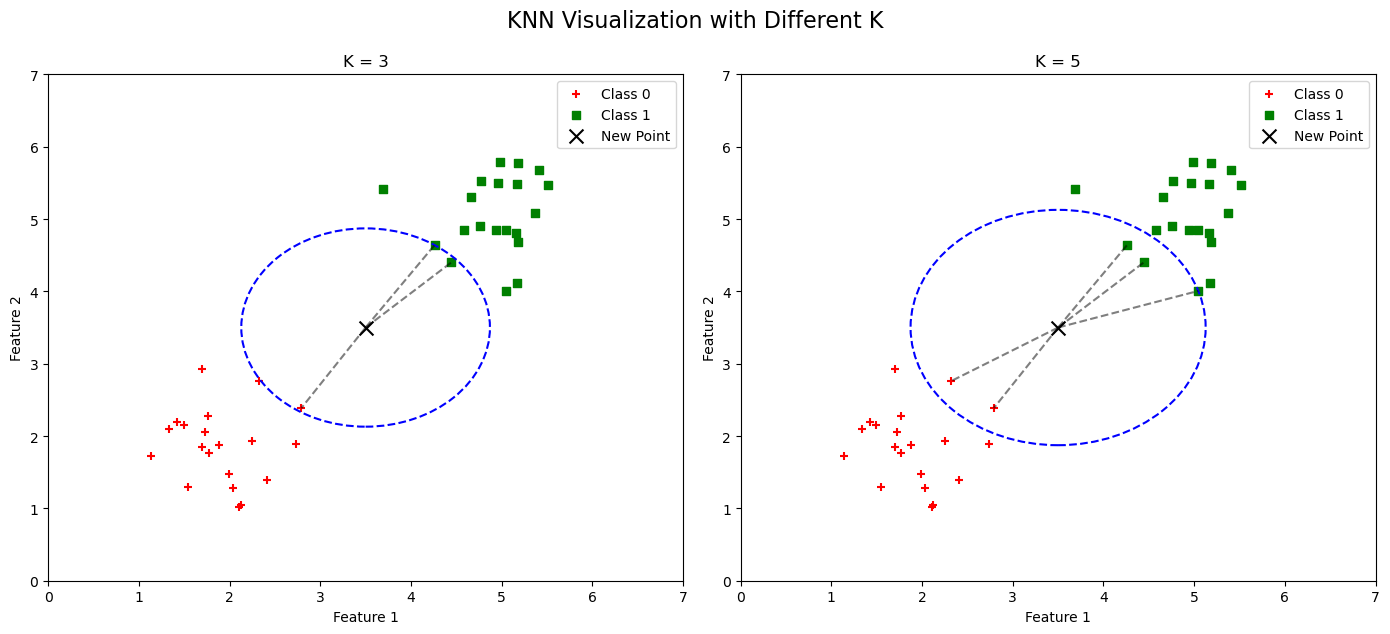

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate a synthetic 2D dataset
np.random.seed(42)
X_class1 = np.random.normal(loc=[2, 2], scale=0.5, size=(20, 2))
X_class2 = np.random.normal(loc=[5, 5], scale=0.5, size=(20, 2))
X = np.vstack([X_class1, X_class2])
y = np.array([0]*20 + [1]*20)

# New data point to classify
new_point = np.array([[3.5, 3.5]])

# Fit KNN classifier
def plot_knn_decision(X, y, new_point, k_values):
    fig, axes = plt.subplots(1, len(k_values), figsize=(14, 6))
    
    for idx, k in enumerate(k_values):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)
        distances, indices = knn.kneighbors(new_point)

        ax = axes[idx]
        ax.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='+', color='red', label='Class 0')
        ax.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='s', color='green', label='Class 1')
        ax.scatter(new_point[:, 0], new_point[:, 1], color='black', marker='x', s=100, label='New Point')

        for i in indices[0]:
            ax.plot([new_point[0, 0], X[i, 0]], [new_point[0, 1], X[i, 1]], 'k--', alpha=0.5)

        # Draw circle around new point
        radius = np.max(distances)
        circle = Circle(new_point[0], radius, color='blue', fill=False, linestyle='--', linewidth=1.5)
        ax.add_patch(circle)

        ax.set_title(f'K = {k}')
        ax.set_xlim(0, 7)
        ax.set_ylim(0, 7)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()

    plt.tight_layout()
    return fig

fig = plot_knn_decision(X, y, new_point, k_values=[3, 5])
fig.suptitle("KNN Visualization with Different K", fontsize=16, y=1.05)
plt.show()


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = churn[['Age', 'AnnualIncome', 'MembershipDuration', 'Gender', 'Location']]
y = churn['Churn']

categorical_cols = ['Gender', 'Location']
numerical_cols = ['Age', 'AnnualIncome', 'MembershipDuration']
# ColumnTransformer applies different preprocessing to column groups:
# here we have one-hot encodes the categorical columns while we do standard scaling to the numerical.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(),numerical_cols )
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Location']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'MembershipDuration'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = churn[['Age', 'AnnualIncome', 'MembershipDuration', 'Gender', 'Location']]
y = churn['Churn']

categorical_cols = ['Gender', 'Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# Decision Tree with stopping criteria
classifier = DecisionTreeClassifier(
    criterion='gini',         # Use Gini impurity
    max_depth=5,              # Limit maximum tree depth
    min_samples_split=4,      # Require at least 4 samples to split a node
    min_impurity_decrease=0.01,  # Require minimum reduction in Gini to split
    random_state=42
)

# Note: We do not apply StandardScaler here because decision trees are 
# scale-invariant. They split based on the order of feature values, not their magnitude.
# Scaling does not affect the splits or performance of tree-based models.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

pipeline.fit(X, y)

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Location'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01,
                                        min_samples_split=4,
                                        random_state=42))])

In [15]:
from sklearn.naive_bayes import GaussianNB

X = churn[['Age', 'AnnualIncome', 'MembershipDuration', 'Gender', 'Location']]
y = churn['Churn']

categorical_cols = ['Gender', 'Location']
numeric_cols = ['Age', 'AnnualIncome', 'MembershipDuration']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Location']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'MembershipDuration'])])),
                ('classifier', GaussianNB())])

In [16]:
from sklearn.linear_model import LinearRegression

X = salary[['YearsExperience', 'EducationLevel', 'Industry', 'City']]
y = salary['Salary']

categorical_features = ['EducationLevel', 'Industry', 'City']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X, y)

y_pred = pipeline.predict(X)

In [17]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, y_pred)
mae

3167.803210683435

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

15634705.786589136

In [19]:
rmse = np.sqrt(mse)
rmse

3954.0745803018353

In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
r2

0.860246547912739

In [21]:
n = len(y)
p = X.shape[1] 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
adjusted_r2

0.857379810434026

In [38]:
X = churn[['Age', 'AnnualIncome', 'MembershipDuration', 'Gender', 'Location']]
y = churn['Churn']

categorical_cols = ['Gender', 'Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X, y)

y_pred = pipeline.predict(X)
y_proba = pipeline.predict_proba(X)[:, 1]

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

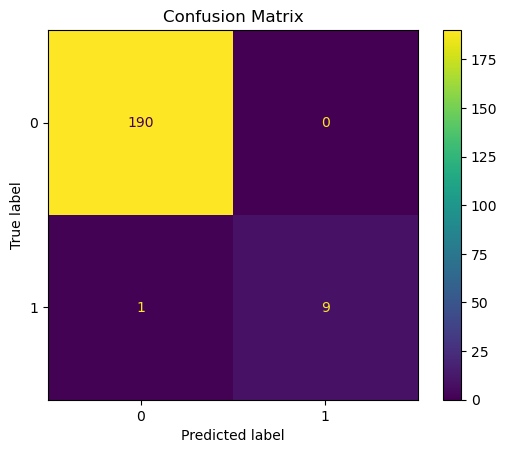

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
accuracy

0.995

In [25]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred)
precision

1.0

In [26]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
recall

0.9

In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
f1

0.9473684210526315

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [43]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.975 1.    1.    0.975 1.   ]
Average accuracy: 0.99


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_